## Name: 
### Rawan AlHarb , Areej Alhowaity

## ID:
### 421010012 , 421010021

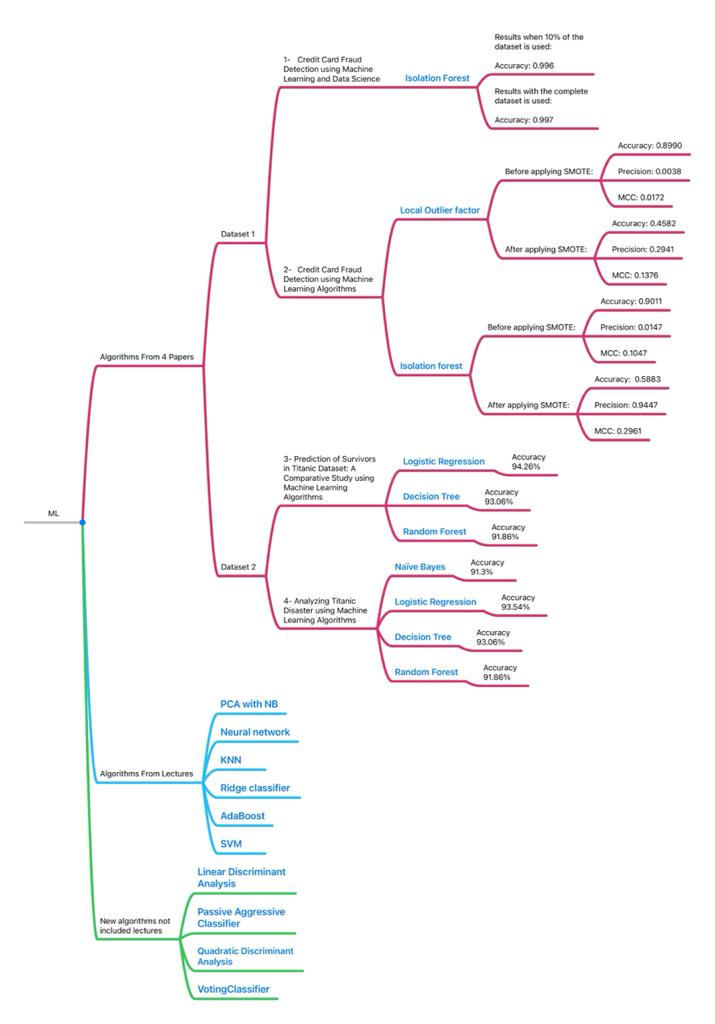

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tabulate import tabulate
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Dataset 1 : Titanic
#### Link: https://www.kaggle.com/c/titanic/overview
### 2 Papers : 
#### 1- Prediction of Survivors in Titanic Dataset: A Comparative Study using Machine Learning Algorithms
#### 2- Analyzing Titanic Disaster using Machine Learning Algorithms




In [2]:
df=pd.read_csv('train_titanic.csv')  # Load training dataset 
df.head()# Display loaded dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df.isnull().sum().sum()

866

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
feature_columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
X=df[feature_columns]
print(X.head())
y=df[['Survived']]
print(y.head())

   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  
3      1      0            113803  53.1000  C123        S  
4      0      0            373450   8.0500   NaN        S  
   Survived
0         0
1         1
2         1
3         1
4         0


In [8]:
X_num=X[['Age','SibSp','Parch','Fare']]  # Define numerical columns
X_cat=X[['Pclass','Sex','Embarked']]   # Define categorical colums


In [9]:
# For complete preprocessing of data:
from sklearn.pipeline import Pipeline  # Import Pipeline
from sklearn.pipeline import FeatureUnion  #Import FeatureUnion
from sklearn.preprocessing import MinMaxScaler  #Import MinMax Scaler
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder 
from sklearn.impute import SimpleImputer

In [10]:
# Create list with columns names of numerical attributes
num_attribs = list (X_num)
# Create list with columns names of categorical attributes
cat_attribs = list (X_cat)

In [11]:
# Define class for selection of columns from dataframes
from sklearn.base import BaseEstimator, TransformerMixin
class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [12]:
num_pipeline = Pipeline([
('selector', DFSelector(num_attribs)),
('imputer_num',SimpleImputer(missing_values=np.nan, strategy='mean')),
('std_scaler', MinMaxScaler()),
])
# Define pipeline for categorical features
cat_pipeline = Pipeline([
('selector', DFSelector(cat_attribs)),
('imputer_cat',SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
('one_hot_encoder', OneHotEncoder()),
])

In [13]:
# Merge both pipelines in one
full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

X = full_pipeline.fit_transform(X)  # Apply full pipeline on features dataset
X=X.toarray()   # Switch new dataset to Numpy array type



In [14]:
#Function to Calculate all metrics for any model binary classifier
# precision, recall, fscore, support ,acc
def append_score(X_test,y_test,model):
    predicted = model.predict(X_test)
    precision1, recall1, fscore1, support1 = score(y_test, predicted,average='binary')
    precision.append(precision1)
    recall.append(recall1)
    fscore.append(fscore1)
    support.append(support1)
    acc.append(accuracy_score(y_test, predicted))

In [15]:
precision, recall, fscore, support , acc = [],[],[],[],[]

In [16]:
#Shuffle and split prepared datasets to train and test (33%) datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

# Algorithms From Lectures

## 1- svm

In [17]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, np.ravel(y_train))
append_score(X_test,y_test,clf_svm)

## 2- KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn =KNeighborsClassifier()
clf_knn.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_knn)

## 3- PCA with NB

In [19]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
pca = PCA(n_components=8)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)


gnb = GaussianNB()
gnb.fit(X_train1, y_train)
append_score(X_test1,y_test,gnb)

## 4- RidgeClassifier

In [20]:
from sklearn.linear_model import RidgeClassifier

clf_ridge =RidgeClassifier()
clf_ridge.fit(X_train,  np.ravel(y_train))

append_score(X_test,y_test,clf_ridge)

## 5- AdaBoostClassifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier

clf_AdaBoost =AdaBoostClassifier()
clf_AdaBoost.fit(X_train,  np.ravel(y_train))

append_score(X_test,y_test,clf_AdaBoost)

## 6- Neural Network

In [22]:
from sklearn.neural_network import MLPClassifier
clf_nn=MLPClassifier()
clf_nn.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_nn)

# New Algorithms not included lectures

## 1- Quadratic Discriminant Analysis

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_qda=QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_qda)

## 2- Linear Discriminant Analysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda=LinearDiscriminantAnalysis()
clf_lda.fit(X_train,  np.ravel(y_train))

append_score(X_test,y_test,clf_lda)

## 3- VotingClassifier

In [25]:
from sklearn.ensemble import VotingClassifier
clf_voting = VotingClassifier(estimators=[('qda', clf_qda), ('svm', clf_svm), ('knn', clf_knn)], voting='hard')
clf_voting.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_voting)

## 4- Passive Aggressive Classifier

In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf_pac=PassiveAggressiveClassifier()
clf_pac.fit(X_train,  np.ravel(y_train))

append_score(X_test,y_test,clf_pac)

# Evaluation stage

In [30]:
#Create a data frame with metrics and print as a table
model_name = ['SVM','Kneighbors','PCA_NB','AdaBoost','Ridge','NN','QDA','LDA','Voting','PAC']
model_category = ['From Lecture','From Lecture','From Lecture','From Lecture','From Lecture','From Lecture','Not in Lecture','Not in Lecture','Not in Lecture','Not in Lecture']

df = pd.DataFrame(list(zip(model_name, model_category,precision, recall, fscore , acc)) ,
                  columns = ['Name', 'Source','Precision','Recall', 'Fscore' ,'Accuracy']) 
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+----+------------+----------------+-------------+----------+----------+------------+
|    | Name       | Source         |   Precision |   Recall |   Fscore |   Accuracy |
|----+------------+----------------+-------------+----------+----------+------------|
|  0 | SVM        | From Lecture   |    0.911392 | 0.642857 | 0.753927 |   0.840678 |
|  1 | Kneighbors | From Lecture   |    0.782178 | 0.705357 | 0.741784 |   0.813559 |
|  2 | PCA_NB     | From Lecture   |    0.741071 | 0.741071 | 0.741071 |   0.80339  |
|  3 | AdaBoost   | From Lecture   |    0.775701 | 0.741071 | 0.757991 |   0.820339 |
|  4 | Ridge      | From Lecture   |    0.790909 | 0.776786 | 0.783784 |   0.837288 |
|  5 | NN         | From Lecture   |    0.857143 | 0.696429 | 0.768473 |   0.840678 |
|  6 | QDA        | Not in Lecture |    0.693548 | 0.767857 | 0.728814 |   0.783051 |
|  7 | LDA        | Not in Lecture |    0.775701 | 0.741071 | 0.757991 |   0.820339 |
|  8 | Voting     | Not in Lecture |    0.873563 | 0.6

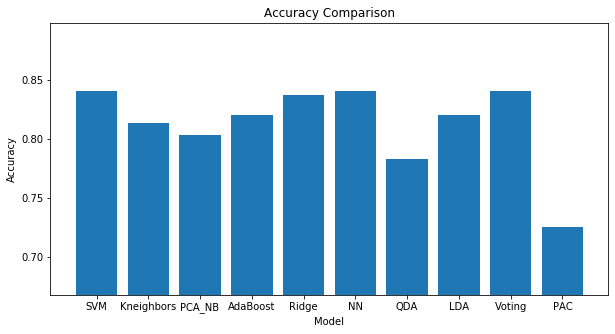

In [28]:
#View Accuracy
plt.figure(figsize=(10,5))
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.bar(df.Name,df.Accuracy)

peak = df.Accuracy.max()-df.Accuracy.min()
plt.ylim(max(0,df.Accuracy.min()-peak/2.), df.Accuracy.max()+peak/2.)

plt.show()

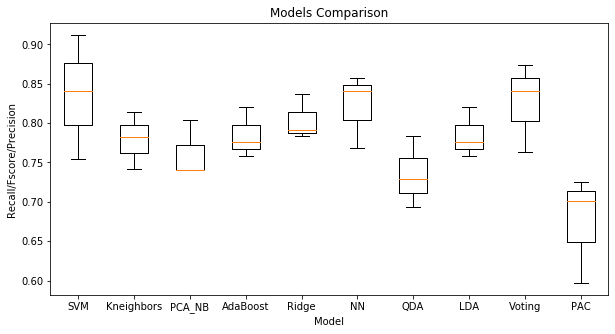

In [29]:
#Plot metrics is box plot

plt.figure(figsize=(10,5))
plt.boxplot(df.drop(['Name','Source','Recall'],axis=1))
plt.title('Models Comparison')
plt.xlabel('Model')
plt.ylabel('Recall/Fscore/Precision')
plt.xticks(np.arange(1,len(acc)+1),df.Name)
plt.show()